# Introduction to Data Visualizations

-----

In a previous lesson, we explored descriptive statistics as a technique for understanding the distribution of (primarily one-dimensional) data. While useful, these analytic quantities have limited utility since they provide summary descriptions, and, especially for those people new to the field, they do not always convey information in a simple manner. In this notebook, we instead use visual techniques to explore one-dimensional data to understand how data are distributed. This method can be a very effective technique for comparing and contrasting data.

In particular, this lesson will explore two different types of visual techniques for conveying information: the boxplot and the histogram.

In this notebook, we will use the _tips_ dataset from the seaborn module to explore how these different visualization techniques can be used to understand a data distribution.

-----

Before making any plots in a notebook, we need to specify that the plots should be displayed inline, which is done in the following Code cell. We also employ the seaborn module, described previously, to make all plots in this notebook more visually appealing. Next, we include several lines that will suppress any warnings that can sometimes occur when making visualizations (for example, due to changes in the installed software stack). Finally, we load the _tips_ dataset, which will be used for the visualizations in this notebook.

----

In [1]:
# Set up Notebook

%matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

# Load the Tips Data
tips = sns.load_dataset("tips")

-----

## Boxplot

A [boxplot][wb] provides a non-parametric, graphical description of the distribution of a set of data. The basic component in the box plot is the box, which encloses the middle 50% of the data (one edge is drawn at the 25th percentile, and the opposite edge is drawn at the 75th percentile), with a line (and an optional indentation mark) drawn at the median of the distribution. The box often has _whiskers_ extending from either end, which are used to mark the extremes of the data distribution. Generally, outliers are removed before calculating the minimum and maximum used to display the whiskers, in which case they are displayed individually extending past the end of the whiskers.

To make boxplots, we will use the seaborn [boxplot function][sb], which can extract a column from a Pandas `DataFrame` to display the data. This method is demonstrated in the following Code cell, where the `total_bill` column is displayed. Following this, two comparative boxplots are drawn to show the difference in the distributions of the `total_bill` column for _lunch_ and _dinner_ receipts. This second plot demonstrates how a boxplot can aid in the comparison of two different data sets with a simple visual device.

-----
[wb]: https://en.wikipedia.org/wiki/Box_plot
[sb]: http://seaborn.pydata.org/generated/seaborn.boxplot.html

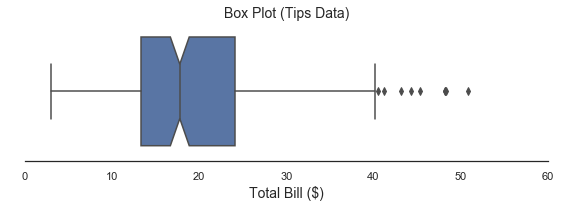

In [5]:
# Define plot layout
fig, axs = plt.subplots(figsize=(10, 2.5))

# sns.set_style("whitegrid")
ax = sns.boxplot(x=tips["total_bill"], notch=True)

# Set x-axis length and label
ax.set_xlim(-2, 62)
ax.set_xlabel('Total Bill (\$)', fontsize=14)

# Title the plot
ax.set_title('Box Plot (Tips Data)', ha='center', fontsize=14)

sns.despine(left=True, offset=2, trim=True)

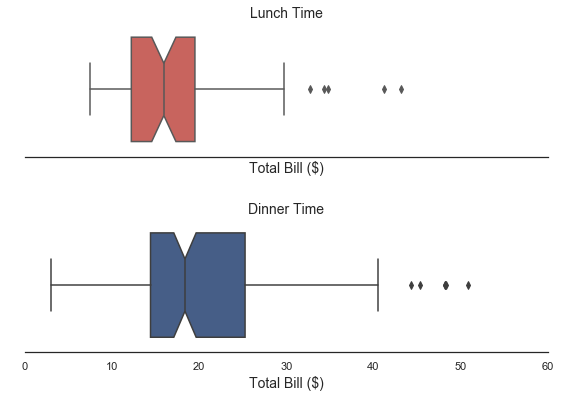

In [6]:
# Compare two distributions by using boxplots

fig, axs = plt.subplots(figsize=(10, 6), nrows=2, ncols=1, sharex=True)
adj = plt.subplots_adjust(hspace=0.5)

# Make each subplot
for idx, data in enumerate(data_tips):
    
    # Boxplot, with notch indicated, oriented horizontal, and set color
    sns.boxplot(ax = axs[idx], x=data, notch=True, orient='h', color = clr[idx])
    
    # No y-axis
    axs[idx].set_yticks([])
    
    # Define x-axis limits and label
    axs[idx].set_xlim(-2, 62)
    axs[idx].set_xlabel('Total Bill (\$)', fontsize=14)
    
    # Title each plot
    axs[idx].set_title(ttl[idx], ha='center', fontsize=14)
    
    # Clean up each plot
    sns.despine(ax=axs[idx], left=True, offset=2, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to make two new boxplots, where the `total_bill` column is displayed first for _female_ patrons and second for _male_ patrons. Be sure to annotate your plot appropriately. 

-----

-----

### Multiple Box Plots

The `boxplot` function in the seaborn library enables a more direct comparison. By using this function and specifying a categorical feature in a DataFrame, we can simplify the plotting code (but not necessarily the plot) by allowing seaborn to make one plot with the distributions of interest. We demonstrate this in the next Code cell by displaying the `total_bill` feature for different days of the week. 

-----

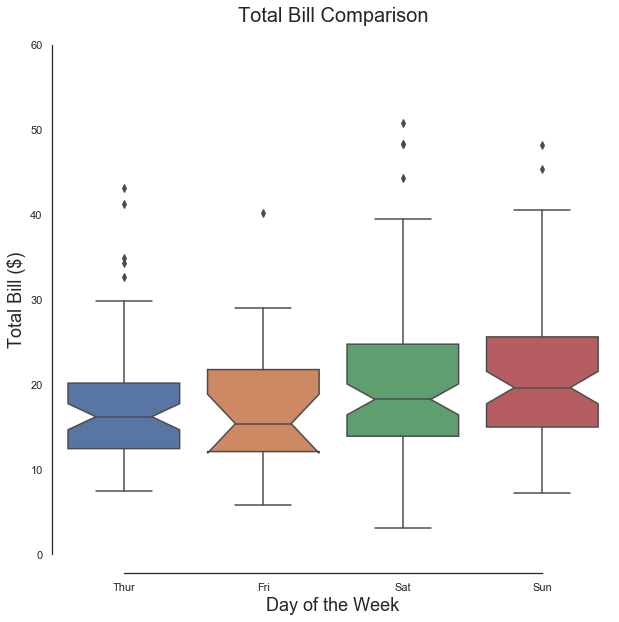

In [7]:
# Compare several distributions by using boxplots

fig, axs = plt.subplots(figsize=(10, 10))

# Boxplot
sns.boxplot(ax = axs, x='day', y='total_bill', data=tips, notch=True)

# Define x-axis limits and label
axs.set_ylim(-2, 62)
axs.set_xlabel('Day of the Week', fontsize=18)
axs.set_ylabel('Total Bill (\$)', fontsize=18)

# Title each plot
axs.set_title('Total Bill Comparison', ha='center', fontsize=20)

# Clean up each plot
sns.despine(ax=axs, offset=2, trim=True)

### Swarm Plot

The seaborn library also provides support for visualizing a univariate distribution as a function of a second categorical variable. This visualization, called a _swarm plot_, displays the univariate distribution broken out by the categorical variable, but adds jitter (or random perturbations) to the distribution so that the full range of data is viewable. This is demonstrated in the following Code cell, where we repeat the last _box plot_ visualization by using the `swarmplot` method from seaborn.

This technique can be useful to compare  relatively small univariate distributions, especially across a second, categorical feature like gender or day of the week. However, as the number of rows (or items) increases, a box plot is generally easier to understand, since the majority of the data points are not directly displayed.

------



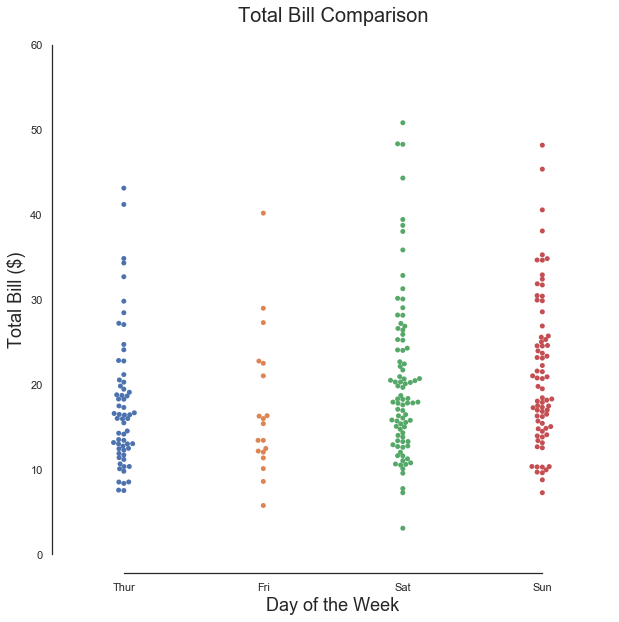

In [8]:
# Compare several distributions by using swarmplots

fig, axs = plt.subplots(figsize=(10, 10))

# Swarmplot
sns.swarmplot(ax = axs, x='day', y='total_bill', data=tips)#, notch=True)

# Define x-axis limits and label
axs.set_ylim(-2, 62)
axs.set_xlabel('Day of the Week', fontsize=18)
axs.set_ylabel('Total Bill (\$)', fontsize=18)

# Title each plot
axs.set_title('Total Bill Comparison', ha='center', fontsize=20)

# Clean up each plot
sns.despine(ax=axs, offset=2, trim=True)

## Histogram

A [histogram](http://en.wikipedia.org/wiki/Histogram) is a binned representation of a data set and is often recommended (by [visualization experts][fdh]) as a basic technique to explore how data are distributed. As a result, it provides a concise representation of data along one dimension, where the size of the representation is determined solely by the number of bins used and not the total number of data points. As a result, it can be used to provide a concise summary of a very large data set. 

There are two primary components in computing a histogram from a set of data points:

1. How many bins should be used?
2. Where should the bins be placed?

The primary choice is simply how many bins should be used to model the density of points. Using more bins can capture more detail but is also susceptible to noise. The spacing of the bins can often be left to the visualizing software. 

### Binning

Sometimes the binning can be determined easily; for example, months of the year or days of the week might provide natural bins. Other times, both the number of bins and the bin ranges will need to be determined before the histogram is constructed. A general rule of thumb is that if you have N data points, you should have root-three N bins. The following Code cell summarizes the results from this formula:

-----

[wh]: https://en.wikipedia.org/wiki/Histogram
[fdh]: http://flowingdata.com/2017/06/07/how-histograms-work/

In [9]:
# We need to import the math library for the ceil method, which returns 
# the next largest integer to a floating point value.

import math as ma

# Print a header line
print('{0}\t{1}'.format('  # Points', '# Bins'))
print(30*'-')

# We want to loop from 10 to 100,000,000
for i in range(1,8):
    
    # Now print out the integer value, and the number of bins
    # We used a math trick here, 10**i**(1/3) = 10**(i/3)
    print("{0:9d}\t{1:4d}\n".format(10**i, ma.ceil(pow(10, i/3.))))

  # Points	# Bins
------------------------------
       10	   3

      100	   5

     1000	  10

    10000	  22

   100000	  47

  1000000	 100

 10000000	 216



-----

### Making a Histogram

Now we are in a position to demonstrate how to make and display a histogram by using matplotlib. We first will need data, and for this example we can reuse the _tips_ data set.  We also start by using the default number of bins, which is ten, and the default bin range, which is the minimum and maximum data values. Finally, to make the plot visually easier to interpret, we set the `alpha` parameter, which controls the transparency of the resulting graphic. I find that a value of `0.5` softens the histogram and enables the data to be seen more easily. But you should change this value (to something between `0` and `1`) to find a value that appeals to you.

Below, we make several changes. First, we explicitly set the _fontsize_ for several functions, which makes the text easier to read. You can change this value to adjust your preferences. Second, we employ the seaborn _despine_ function to clean up the plot by offsetting the axes from the data and trimming the axes to the data range.

-----

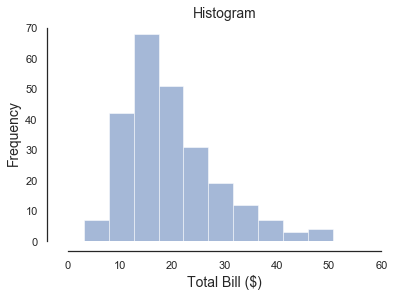

In [10]:
# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

# Now we want to make a default histogram
ax.hist(tips['total_bill'], alpha = .5)

# Set our axis limits, labels, and plot title
ax.set_title("Histogram", fontsize=14)

ax.set_xlim(-2,62)
ax.set_xlabel("Total Bill (\$)", fontsize=14)

ax.set_ylabel("Frequency", fontsize=14)

# Clean up final result
sns.despine(offset=10, trim=True)

-----

In this simple example, we create a histogram, or binned representation, from the `'total_bill'` column in the _tips_ DataFrame. Matplotlib automatically creates the ten bins and computes the frequency with which values in the input data set occur in each bin and plots the results.

### Histogram Options

Now that our first histogram is completed, we can look at changing the default selections, such as the number of bins, the bin centers, and the color and style of the histogram bins. These values can all be changed by passing parameters into the histogram function. 

First, the number and locations of the bins used to construct the histogram can be specified by using the bin parameter. There are several different ways to control this parameter:

- `bins = 22` will give twenty-two bins.
- `bins = (0,20,90,100)` will produce three bins that span 0-20, 20-90, and 90-100, respectively.
- `bins = np.linspace(0, 100, 100)` will produce one hundred bins linearly spaced between zero and one hundred.

Second, there are four different types of histogram plots that you can make: `bar`, `barstacked`, `step`, and `stepfilled`, with `bar` being the default value. The next Code cell demonstrates `step`; try changing it to one of the other values.

Third, you can specify the line or fill color of the bins by defining the `color` parameter. 

-----

### Histogram Range

Sometimes the frequency counts can vary dramatically between bins. In that case, it is often convenient to change the presentation of the frequency counts to improve the discrimination of different bin counts. This change can easily be accomplished by changing the vertical axis to display the logarithm of the frequency count, which is done by setting the optional parameter `log` to `True`. In the following example, the Histogram is displayed by using logarithmic binning on the vertical axis; try changing the `log=True` to `log=False` to see the difference in the generated histogram.

-----

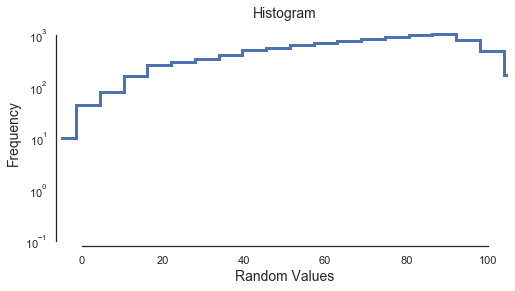

In [11]:
# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(8, 4))

# Now we generate something to plot. In this case, we will need data 
# that are randomly sampled, but we want them to be non-uniform

x = np.sqrt(np.linspace(0, 10000, 10000))
y = x + np.random.uniform(-10, 10, 10000)

# Now we want to make a default histogram
ax.hist(y, bins=20 , histtype='step', lw=3, log=True)

# Set our axis labels and plot title
ax.set_title("Histogram", fontsize=14)

ax.set_xlim(-5,105)
ax.set_xlabel("Random Values", fontsize=14)

ax.set_ylabel("Frequency", fontsize=14)

# Show final result
sns.despine(offset=5, trim=True)

-----

### Multiple Histograms

In certain cases, it may be instructive to compare two distributions directly within the same plot. For example, if you have computed a histogram of the ages of people in a population, you might want to differentiate the male and female populations in separate histograms for comparison. This difference can easily be highlighted by simply overplotting two histograms. In the following example, we create two populations, y1 and y2, and display their histograms within the same plot window. Note that by default, the two histograms will be overplotted, so to allow both to be seen, we set the `alpha` parameter in the second one, which makes the second histogram somewhat transparent (based on the value assigned to the `alpha` parameter).

We also assign a label to each histogram so that the `legend` method can be used to differentiate between the two histograms.

-----

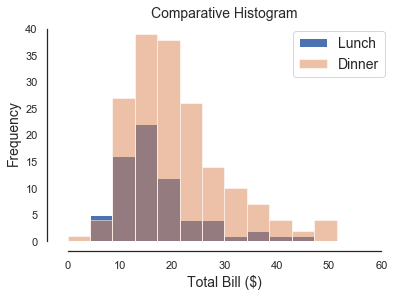

In [12]:
# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

mybins = np.linspace(0, 60, 15)
ax.hist(data_tips[0], bins=mybins, histtype='bar', label='Lunch')
ax.hist(data_tips[1], bins=mybins, histtype='bar', label='Dinner', alpha=0.5)

# Set our axis labels and plot title
ax.set_title("Comparative Histogram", fontsize=14)

ax.set_xlim(-2,62)
ax.set_xlabel("Total Bill (\$)", fontsize=14)

ax.set_ylabel("Frequency", fontsize=14)

ax.legend(fontsize=14)

sns.despine(offset=10, trim=True)

-----

The two histograms can also be plotted side-by-side, which can often simplify a comparison. In the following example, we plot two histograms side-by-side. In this case, we pass the two data sets as a list to the same histogram method call, which means we also need to pass the labels as a list. All other parameters will be assigned equally to the two histograms.

In this sample code, we have also used the [figure method](http://matplotlib.org/api/figure_api.html#matplotlib.figure. Figure) to specify a larger plot window (which is helpful for comparing multiple histograms).

-----

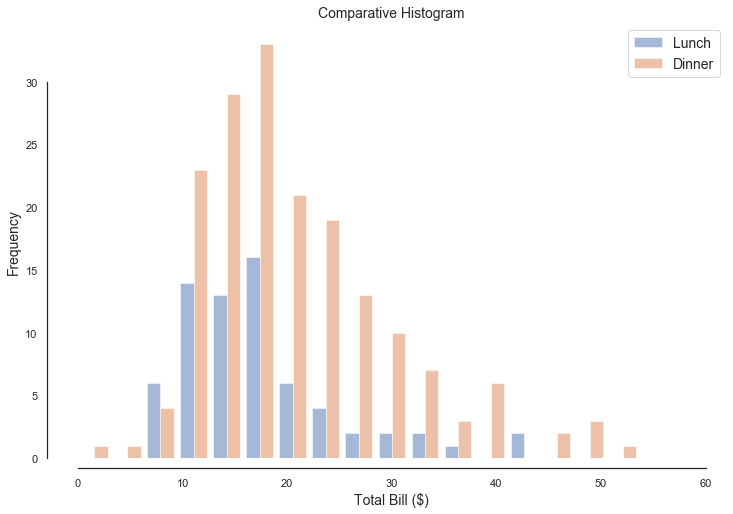

In [13]:
# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(12, 8))

mybins = np.linspace(0, 60, 20)
ax.hist(data_tips, bins=mybins, histtype='bar', label=['Lunch', 'Dinner'], alpha=0.5)

# Set our axis labels and plot title
ax.set_title("Comparative Histogram", fontsize=14)

ax.set_xlim(-2,62)
ax.set_xlabel("Total Bill (\$)", fontsize=14)

ax.set_ylabel("Frequency", fontsize=14)

ax.legend(fontsize=14)

sns.despine(offset=10, trim=True)


-----

In all of the sample codes provided in this notebook, we have ignored the return values from the `hist` method. In truth, this function returns three items:

* `n`, the number contained within each bin. The length of this array is the same as the number of bins used to make the histogram.
* `bins`, the bin edges. The number of edges is one more than the number of bins.
* `patches`, which are matplotlib plotting objects (to make the bins show up), but you will generally ignore these.

The first two arrays can often prove useful if you want to operate on the histogrammed data (in addition to plotting them). To use these data, you simply capture the returned values:

```python
n, bins, patches = ax.hist(y)
```

-----

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to display, side-by-side, two new histograms, where the `total_bill` column is displayed first for _female_ patrons and second for _male_ patrons. Be sure to annotate your histogram plot appropriately. How does this visual representation communicate information better than the corresponding boxplot?


-----

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. [Matplotlib pyplot tutorial][1]
2. [Matplotlib tutorial][2] from Scipy
4. [Seaborn tutorial][4]
3. The [visualization chapter][pdc] from the book _Python Data Science Handbook_ by Jake VanderPlas

-----

[1]: http://matplotlib.org/users/pyplot_tutorial.html
[2]: http://www.scipy-lectures.org/intro/matplotlib/index.html
[4]: http://seaborn.pydata.org/tutorial.html
[pdc]: http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode